# Course Outline: Digital Signal Processing in Geophysics using Python

## Part 1: Introduction to Signals

### 1.1 What is a Signal?
#### Conceptual Overview:

Definition: A signal is a representation of physical quantities that can convey information.
Types of Signals:
Analog Signals: Continuous signals that vary smoothly over time.
Digital Signals: Discrete signals sampled at intervals.

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Example of a simple sine wave signal
t = np.linspace(0, 1, 500)  # Time vector from 0 to 1 second, 500 samples 
frequency = 5  # Frequency in Hertz
amplitude = 1  # Amplitude of the sine wave
signal = amplitude * np.sin(2 * np.pi * frequency * t)  # Sine wave formula

# Plotting the signal
plt.plot(t, signal)
plt.title('Sine Wave Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


### How to add noise to Signal


Sine Waves: Common in geophysical signals, represent periodic phenomena.

Noise: Random variations in data; can be natural or instrumental.



In [ ]:
# Creating a composite signal: sine wave + noise
noise = 0.1 * amplitude* np.random.normal(size=t.size)  # Generate Gaussian noise
signal_noisy = signal + noise  # Composite signal

# Plotting the composite signal
plt.plot(t, signal_noisy)
plt.title('Noisy Signal: Sine Wave with Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [ ]:
# Advanced Plotting: Multiple signals
plt.figure(figsize=(10, 5))

# Plotting the original sine wave
plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Sine Wave')
plt.title('Original Sine Wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plotting the composite signal
plt.subplot(2, 1, 2)
plt.plot(t, signal_noisy, label='Noisy Signal', color='orange')
plt.title('Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 2.4 What is a Wavelet?

### Conceptual Overview:

- **Wavelets**: Functions that divide data into different frequency components, allowing analysis at various resolutions. They are particularly useful for non-stationary signals (signals whose statistical properties change over time).
- **Wavelet Transform**: Decomposes a signal into wavelets; it's used for signal compression, noise reduction, and feature extraction.

### Types of Wavelets:

- **Continuous Wavelet Transform (CWT)**: Provides a time-scale representation of a signal.
- **Discrete Wavelet Transform (DWT)**: Efficiently decomposes the signal into a hierarchy of sub-bands, used for signal compression.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def mexican_hat_wavelet(t, a):
    """Mexican Hat (Ricker) wavelet function.
    
    Args:
    t (np.ndarray): Time vector.
    a (float): Scaling factor for the wavelet width.
    
    Returns:
    np.ndarray: Wavelet values corresponding to time vector.
    """
    part1 =  2 / ((np.sqrt(3) * a) * (np.pi)**0.25)
    part2 = (1 - (t**2) / (2 * a**2))
    part3 = np.exp(-t**2 / (2 * a**2))
    return part1 * part2 * part3
    

In [ ]:
# define time vector
t1 = np.linspace(-5, 5, 1000)
a1 = 1
#Generate MH wavelet
wavelet = mexican_hat_wavelet(t=t1, a=a1)

In [ ]:
plt.plot(t1, wavelet)
plt.title('Mexican Hat Wavelet')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### 3.3 What is FFT?

#### Conceptual Overview:

- **Fast Fourier Transform (FFT)**: An algorithm to compute the discrete Fourier transform (DFT) and its inverse. FFT is a powerful tool for analyzing the frequency components of signals, making it essential in signal processing.
- **Discrete Fourier Transform (DFT)**: Converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT), which is a complex-valued function of frequency.

#### Formula:
The DFT of a sequence $( x[n] )$ is given by:

$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i \frac{2\pi}{N} kn}
$

where $( k )$ is the index of the frequency component, $( N )$ is the number of samples, and $( i )$ is the imaginary unit.
### 3.4 Applications of FFT in Signal Processing

#### Applications:

- **Spectral Analysis**: Identifying the frequency components of a signal.
- **Signal Filtering**: Designing filters in the frequency domain to remove noise or extract certain frequency bands.
- **Signal Compression**: Representing a signal with fewer data points by focusing on its most significant frequency components.


In [ ]:
# Example signal: Sum of two sine waves with different frequencies
t = np.linspace(0, 1, 500, endpoint=False)
freq1, freq2 = 5, 20  # Frequencies of the sine waves
signal = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

# Plotting the signal and its FFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

In [ ]:
(freq1, freq2)

In [ ]:
# Applying FFT
fft_result = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(fft_result), t[1] - t[0])

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(np.abs(fft_freqs), np.abs(fft_result))
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(fft_freqs[:len(fft_freqs)//2], np.abs(fft_result)[:len(fft_result)//2])
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

## Part 4: Filters in Signal Processing and Denoising Gaussian Noise

### 4.1 What are Low-Pass, High-Pass, and Band-Pass Filters?

#### Conceptual Overview:

- **Filters**: Tools used in signal processing to selectively pass or attenuate certain frequencies in a signal.

#### Low-Pass Filter (LPF):

- **Definition**: Allows frequencies below a certain cutoff frequency to pass through and attenuates frequencies higher than the cutoff.
- **Use Case**: Smoothing signals, removing high-frequency noise.

#### High-Pass Filter (HPF):

- **Definition**: Allows frequencies above a certain cutoff frequency to pass through and attenuates frequencies below the cutoff.
- **Use Case**: Removing low-frequency components, such as drifts or trends.

#### Band-Pass Filter (BPF):

- **Definition**: Allows frequencies within a certain range (band) to pass through and attenuates frequencies outside this range.
- **Use Case**: Isolating specific frequency components, such as those in a particular band.

#### Mathematical Representations:

- Filters are often implemented using convolution with a kernel (in the time domain) or multiplication with a transfer function (in the frequency domain).

### 4.2 Denoising Gaussian Noise Using Filters

#### Conceptual Overview:

- **Denoising**: The process of removing noise from a signal. Gaussian noise can be mitigated using filters by targeting the noise's frequency characteristics.

#### Denoising Techniques:

- **Low-Pass Filtering**: Effective for removing high-frequency noise from a signal.
- **High-Pass Filtering**: Useful for removing low-frequency noise or drifts, often not as effective for Gaussian noise, which typically affects higher frequencies.
- **Band-Pass Filtering**: Useful when the noise affects both low and high frequencies, isolating the signal within a certain frequency range.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate a sample signal: A sine wave with Gaussian noise
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
noise = np.random.normal(0, 0.5, t.shape)
noisy_signal = signal + noise

# Filter design: Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply low-pass filter
fs = 500  # Sampling frequency
cutoff = 10  # Cutoff frequency
b, a = butter_lowpass(cutoff, fs)
filtered_signal_lpf = filtfilt(b, a, noisy_signal)

# Apply high-pass filter
cutoff_high = 1  # Cutoff frequency for high-pass
b, a = butter_highpass(cutoff_high, fs)
filtered_signal_hpf = filtfilt(b, a, noisy_signal)

# Apply band-pass filter
lowcut = 4
highcut = 6
b, a = butter_bandpass(lowcut, highcut, fs)
filtered_signal_bpf = filtfilt(b, a, noisy_signal)

# Plotting results
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.title('Original Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(t, filtered_signal_lpf, label='Low-Pass Filtered', color='orange')
plt.title('Low-Pass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(t, filtered_signal_hpf, label='High-Pass Filtered', color='green')
plt.title('High-Pass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(t, filtered_signal_bpf, label='Band-Pass Filtered', color='red')
plt.title('Band-Pass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate FFT and its corresponding frequency bins
def compute_fft(signal, fs):
    N = len(signal)
    fft_vals = np.fft.fft(signal)
    fft_vals = np.abs(fft_vals) / N  # Normalize amplitude
    fft_freqs = np.fft.fftfreq(N, 1/fs)
    return fft_freqs[:N // 2], fft_vals[:N // 2]  # Return one-sided spectrum

# Sampling frequency
fs = 500

# Original signal's FFT
fft_freqs_orig, fft_vals_orig = compute_fft(signal, fs)

# Noisy signal's FFT
fft_freqs_noisy, fft_vals_noisy = compute_fft(noisy_signal, fs)

# Low-pass filtered signal's FFT
fft_freqs_lpf, fft_vals_lpf = compute_fft(filtered_signal_lpf, fs)

# High-pass filtered signal's FFT
fft_freqs_hpf, fft_vals_hpf = compute_fft(filtered_signal_hpf, fs)

# Band-pass filtered signal's FFT
fft_freqs_bpf, fft_vals_bpf = compute_fft(filtered_signal_bpf, fs)

# Plotting the FFT results
plt.figure(figsize=(15, 10))

plt.subplot(5, 1, 1)
plt.plot(fft_freqs_orig, fft_vals_orig, label='Original Signal FFT')
plt.title('FFT of Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(5, 1, 2)
plt.plot(fft_freqs_noisy, fft_vals_noisy, label='Noisy Signal FFT', color='orange')
plt.title('FFT of Noisy Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(5, 1, 3)
plt.plot(fft_freqs_lpf, fft_vals_lpf, label='Low-Pass Filtered Signal FFT', color='green')
plt.title('FFT of Low-Pass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(5, 1, 4)
plt.plot(fft_freqs_hpf, fft_vals_hpf, label='High-Pass Filtered Signal FFT', color='red')
plt.title('FFT of High-Pass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(5, 1, 5)
plt.plot(fft_freqs_bpf, fft_vals_bpf, label='Band-Pass Filtered Signal FFT', color='purple')
plt.title('FFT of Band-Pass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()


In [1]:
from obspy.io.segy.segy import _read_segy

# Load the SEG-Y file
sgyfile = 'C:/Users/Amir/Desktop/mygit/seismic data/Stack denoise.segy'
seismic_data = _read_segy(sgyfile)

# Inspect the first trace header
print(seismic_data.traces[0].header)


trace_sequence_number_within_line: 0
trace_sequence_number_within_segy_file: 1
original_field_record_number: 107
trace_number_within_the_original_field_record: 1
energy_source_point_number: 100
ensemble_number: 2002
trace_number_within_the_ensemble: 0
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 1
data_use: 0
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 15
receiver_group_elevation: 3833000
surface_elevation_at_source: 3928000
source_depth_below_surface: 180000
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: -10000
scalar_to_be_applied_to_all_coordinates: -100
source_coordinate_x: 99459513
source_coordinate_y: 998830200
group_coordinate_x: 99458881
group_coordinate_y: 998828800
coordinate_units: 3
weathering_velocity: 0
subweathering_veloc

In [ ]:
pwd

In [2]:
# Number of traces
num_traces = len(seismic_data.traces)
print(f"Number of traces: {num_traces}")


Number of traces: 858


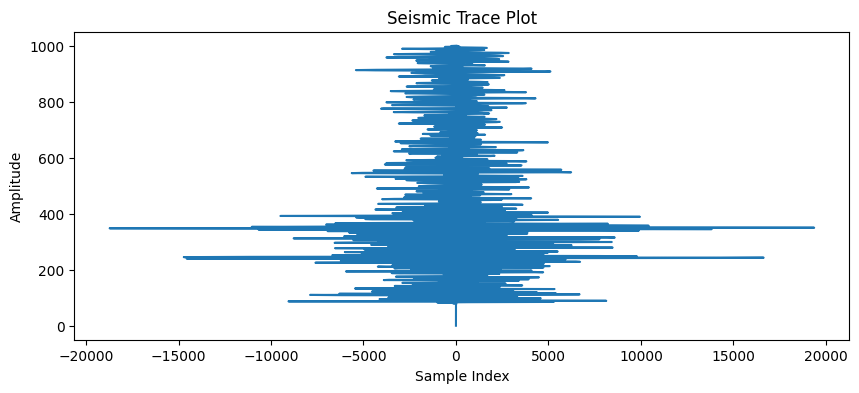

In [6]:
import matplotlib.pyplot as plt

# Extract the first trace data
trace_data = seismic_data.traces[40].data

# Plot the trace
plt.figure(figsize=(10, 4))
plt.plot(trace_data, range(len(trace_data)))
plt.title("Seismic Trace Plot")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

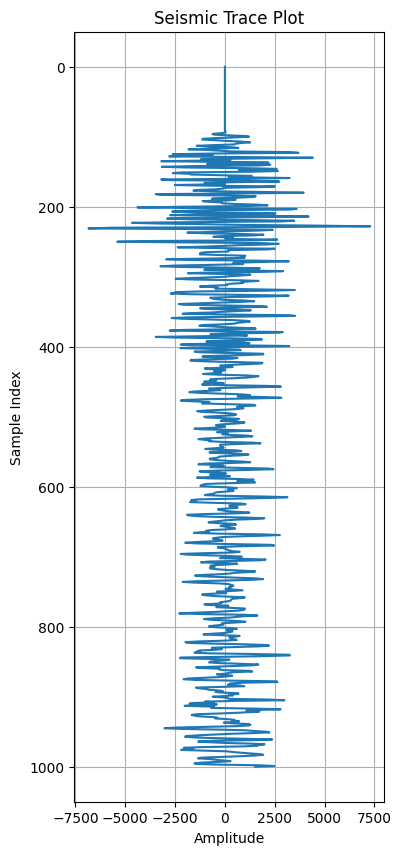

In [9]:
import matplotlib.pyplot as plt

# Extract the first trace data
trace_data = seismic_data.traces[587].data

# Plot the trace
plt.figure(figsize=(4, 10))  # Adjusting figure size for vertical orientation

# Plot with swapped axes to rotate the trace 90 degrees
plt.plot(mytrace, range(len(trace_data)))
plt.title("Seismic Trace Plot")
plt.xlabel("Amplitude")
plt.ylabel("Sample Index")
plt.grid(True)

# Invert the y-axis to have the 0 sample index at the top (optional)
plt.gca().invert_yaxis()
plt.savefig('fig2.png')

# Show the plot
plt.show()


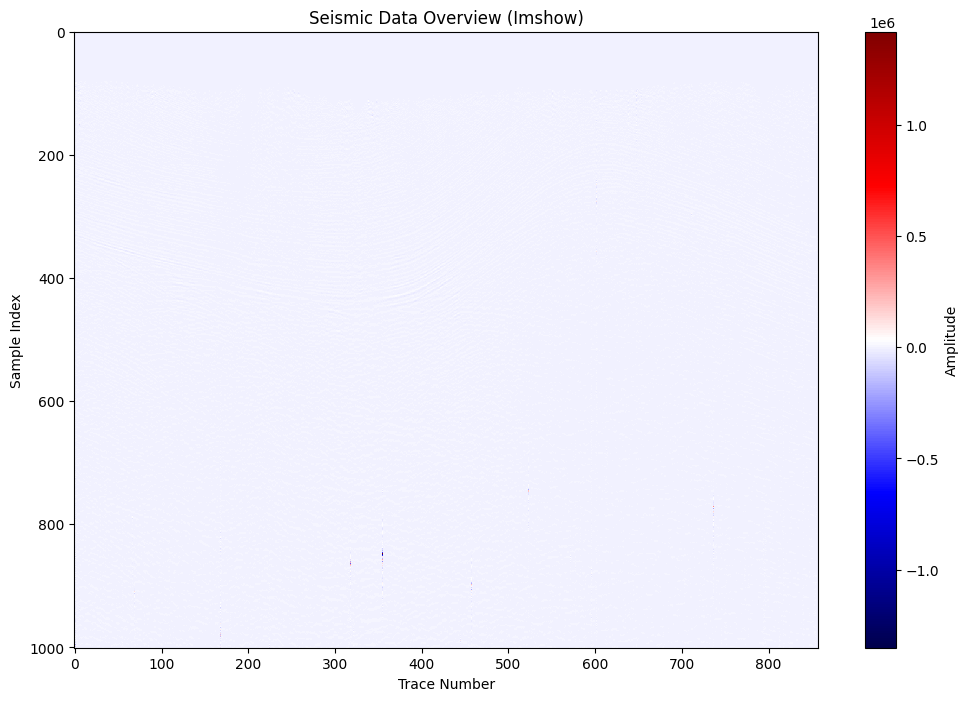

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Convert all traces into a 2D numpy array (rows: samples, columns: traces)
data_matrix = np.array([trace.data for trace in seismic_data.traces]).T

# Visualize the data using imshow
plt.figure(figsize=(12, 8))
plt.imshow(data_matrix cmap='seismic', interpolation='none')
plt.colorbar(label='Amplitude')
plt.title("Seismic Data Overview (Imshow)")
plt.xlabel("Trace Number")
plt.ylabel("Sample Index")
plt.show()


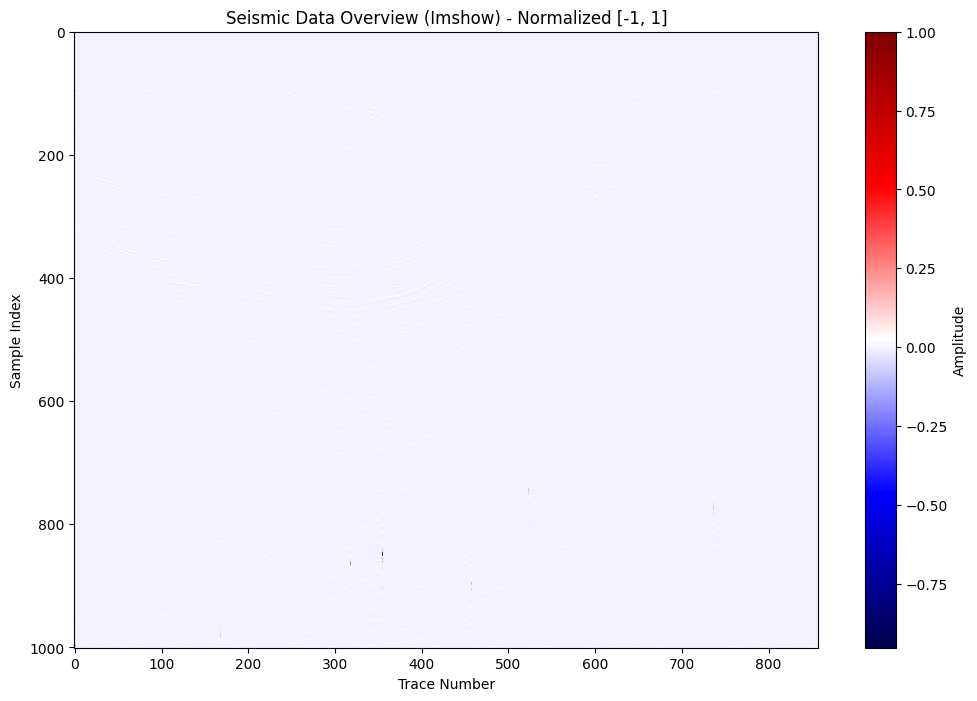

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Convert all traces into a 2D numpy array (rows: samples, columns: traces)
data_matrix = np.array([trace.data for trace in seismic_data.traces]).T

# Normalize the data to the range [-1, 1]
data_matrix_normalized = data_matrix / np.max(np.abs(data_matrix))

# Visualize the normalized data using imshow
plt.figure(figsize=(12, 8))
plt.imshow(data_matrix_normalized, aspect='auto', cmap='seismic', interpolation='none')
plt.colorbar(label='Amplitude')
plt.title("Seismic Data Overview (Imshow) - Normalized [-1, 1]")
plt.xlabel("Trace Number")
plt.ylabel("Sample Index")
plt.show()


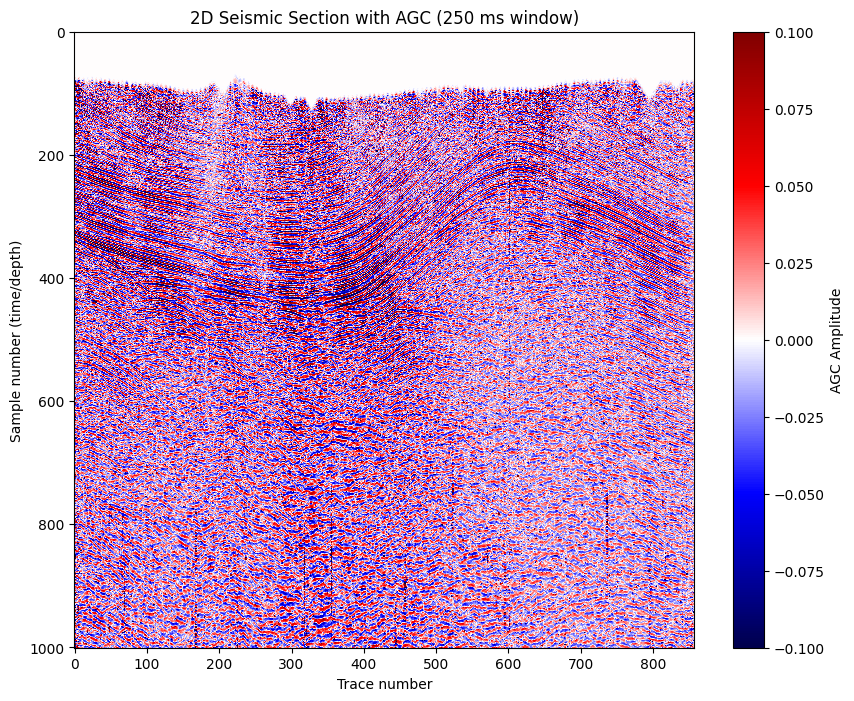

In [25]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

# Open the SEGY file
segyfile = 'C:/Users/Amir/Desktop/mygit/seismic data/Stack denoise.segy'
with segyio.open(segyfile, "r", ignore_geometry=True) as f:
    seismic_data = np.array([trace for trace in f.trace.raw[:]])

    # Normalize the seismic data
    seismic_data_normalized = seismic_data / np.max(np.abs(seismic_data))

    # Define the AGC window length (250 ms)
    sampling_interval_ms = segyio.tools.dt(f) / 1000  # convert from microseconds to milliseconds
    window_length_samples = int(10 / sampling_interval_ms)

    # Apply AGC to the seismic data
    def apply_agc(trace, window_length):
        agc_trace = np.zeros_like(trace)
        half_window = window_length // 2

        for i in range(len(trace)):
            start = max(i - half_window, 0)
            end = min(i + half_window, len(trace))

            rms_amplitude = np.sqrt(np.abs(np.mean(trace[start:end] ** 1)))

            if rms_amplitude > 0:
                agc_trace[i] = trace[i] / rms_amplitude
            else:
                agc_trace[i] = 0

        return agc_trace

    seismic_data_agc = np.array([apply_agc(trace, window_length_samples) for trace in seismic_data_normalized])

# Plot the AGC-applied seismic section
plt.figure(figsize=(10, 8))
plt.imshow(seismic_data_agc.T, cmap='seismic', aspect='auto', vmin=-0.1, vmax=0.1)
plt.colorbar(label='AGC Amplitude')
plt.title('2D Seismic Section with AGC (250 ms window)')
plt.xlabel('Trace number')
plt.ylabel('Sample number (time/depth)')
plt.show()
